In [108]:
import numpy as np 
import scipy as sp
from scipy.optimize import root
import matplotlib.pyplot as plt
from numpy.linalg import eigvals


# Maier Saupe Model 

The free energy is given by: 
$$f(t,Q_{\mu\mu})=\frac{1}{2}\sum_{\mu}Q_{\mu\mu}^2 -t\ln2 + \frac{1}{2}\sum_\mu Q_{\mu\mu} -t\ln\sum_{\mu}e^{\frac{3Q_{\mu\mu}}{2t}}$$
where $\mu=x,y,z$. Here we perform the chenge of variables $S \equiv Q_{zz}$ and $\eta \equiv Q_{yy} - Q_{xx}$

#### If $S\neq 0$ and $\eta = 0$

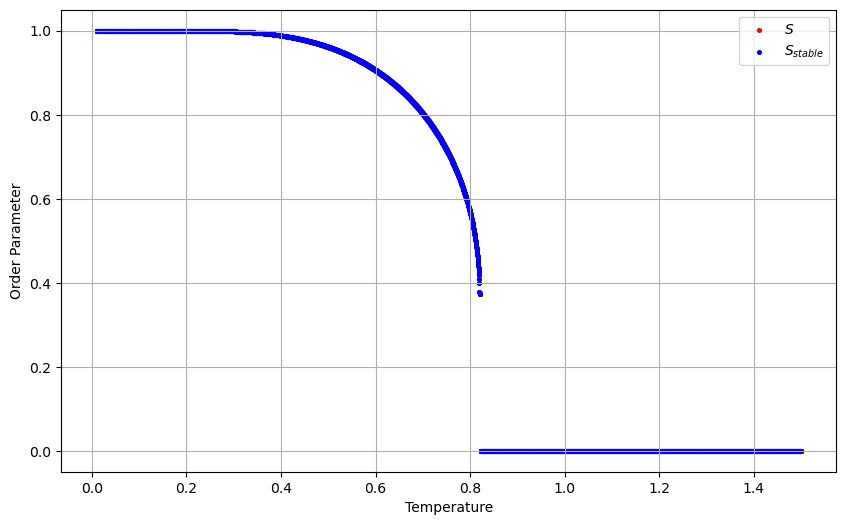

In [257]:
def free_energy(t,S): 
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp(-(3/4)*S/t)

    return 3*(S**2)/4 - t*np.log(exp_1+2*exp_2) - t*np.log(2)

def first_eqs(t,S): 
    exp_1=np.exp((9/4)*S/t)

    denom= 2 + exp_1 
    
    return S + 3/denom - 1

def hessian(t,S): 
    exp_1=np.exp((9/4)*S/t)

    # Define the denominator
    denominator_1 = t * (2 + exp_1)**2 
    denominator_2 = 8*t + 4*exp_1*t 

    # Define the elements of the Hessian matrix 
    H11 = 1 + (9/4)*1/denominator_1 - 9/denominator_2
    H12 = (9/4)* 1/denominator_1
    H13 = (9/4)* exp_1/denominator_1
    H33 =  1 + 9/denominator_1 - 18/denominator_2


    # Construct the Hessian matrix using numpy
    hessian_matrix = np.array([[H11, H12, H13],
                                [H12, H11, H13],
                                [H13, H13, H33]])
    
    return hessian_matrix

eigenvalues=[]

def stability_check(t,S): 
    eigen_values = eigvals(hessian(t,S))
    eigenvalues.append(eigen_values)

    return False if any(i < 0 for i in eigen_values) else True

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5000)
S_vals = []


for t in T_vals:
    sol = root(lambda x : [first_eqs(t,x[0])], [S_vals[-1]] if S_vals else [1.0],  method='lm')
    S_vals.append(sol.x[0])


S_stable=[]
T_stable=[]


for i in range(len(T_vals)): 
    if stability_check(T_vals[i],S_vals[i]):
        S_stable.append(S_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S_{stable}$', color='blue',s=7)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig1.savefig(fname='Uniaxial_Result')


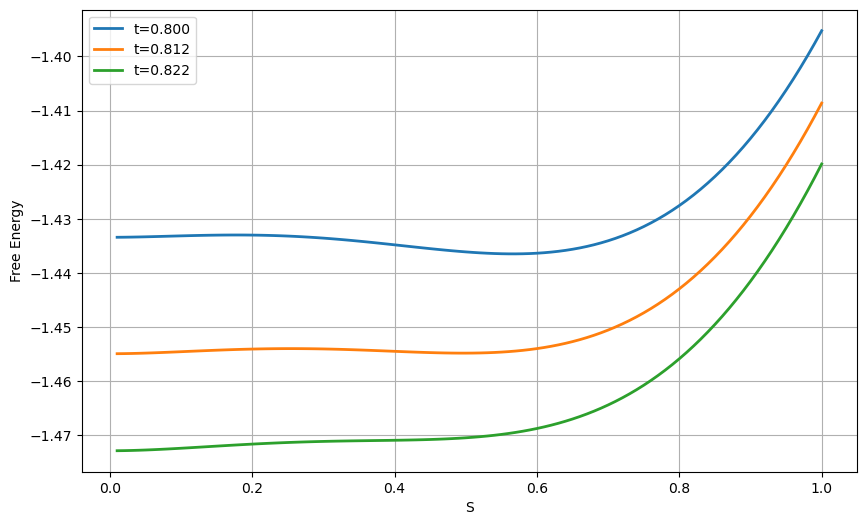

In [277]:


t_sample = [0.8, 0.812, 0.822]
s_sample = np.linspace(0.01, 1.0, 100)

fig=plt.figure(figsize=(10, 6))

i=0

for t_val in t_sample: 
    
    i+=1   
    energy_vals = [] 
    
    for s in s_sample:

        energy_vals.append(free_energy(t_val, s))
    
    #Save the data 
    data = np.column_stack((s_sample, energy_vals))
    np.savetxt(f'Energy_data_{i}', data , delimiter=' ', fmt='%f') 
    
    # Plot the curves
    plt.plot(s_sample, energy_vals, linewidth=2, label=f't={t_val:.3f}')

# Plot settings
plt.xlabel('S')
plt.ylabel('Free Energy')
plt.grid(True)
plt.legend()
plt.show()

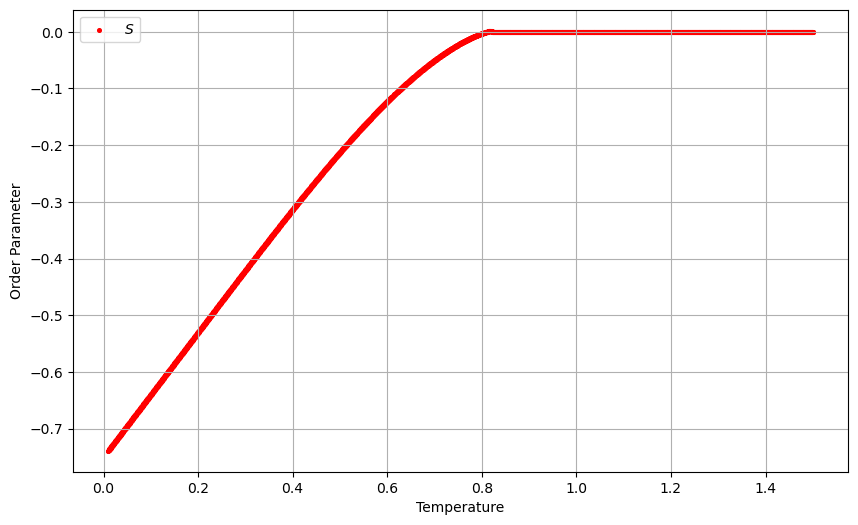

In [210]:
delta_e=[]

for i in range(len(T_stable)): 
    t=T_stable[i]
    S=S_stable[i]
    delta= free_energy(t,S) + t*np.log(3)
    delta_e.append(delta)

# Plot
fig2=plt.figure(figsize=(10, 6))

plt.scatter(T_stable, delta_e, label=r'$S$', color='red',s=7)
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig2.savefig(fname='Uniaxial_Energy_Difference')

In [252]:
for i in range(100): 
    print(f'-----------\n t: {T_stable[2670 + i]}, S: {S_stable[2670 + i]} \n Delta Energy: {delta_e[2650+i]} \n Hessian Eigenvalues: {eigenvalues[2650+i]} \n----------- ')

-----------
 t: 0.8058191638327666, S: 0.5366938758264352 
 Delta Energy: -0.0031027855885222833 
 Hessian Eigenvalues: [1.         0.59389298 0.13345203] 
----------- 
-----------
 t: 0.806117223444689, S: 0.5350082708959827 
 Delta Energy: -0.003014342579627627 
 Hessian Eigenvalues: [1.         0.59275302 0.13214162] 
----------- 
-----------
 t: 0.8064152830566114, S: 0.5333020631224368 
 Delta Energy: -0.002926336746080671 
 Hessian Eigenvalues: [1.         0.59160272 0.13082524] 
----------- 
-----------
 t: 0.8067133426685338, S: 0.5315745521705203 
 Delta Energy: -0.002838770658461276 
 Hessian Eigenvalues: [1.         0.59044182 0.12950275] 
----------- 
-----------
 t: 0.8070114022804562, S: 0.52982499668136 
 Delta Energy: -0.002751646945748254 
 Hessian Eigenvalues: [1.         0.58927007 0.12817403] 
----------- 
-----------
 t: 0.8073094618923785, S: 0.5280526108222077 
 Delta Energy: -0.0026649682976560563 
 Hessian Eigenvalues: [1.         0.58808721 0.12683891] 
------

### Saving files for plot

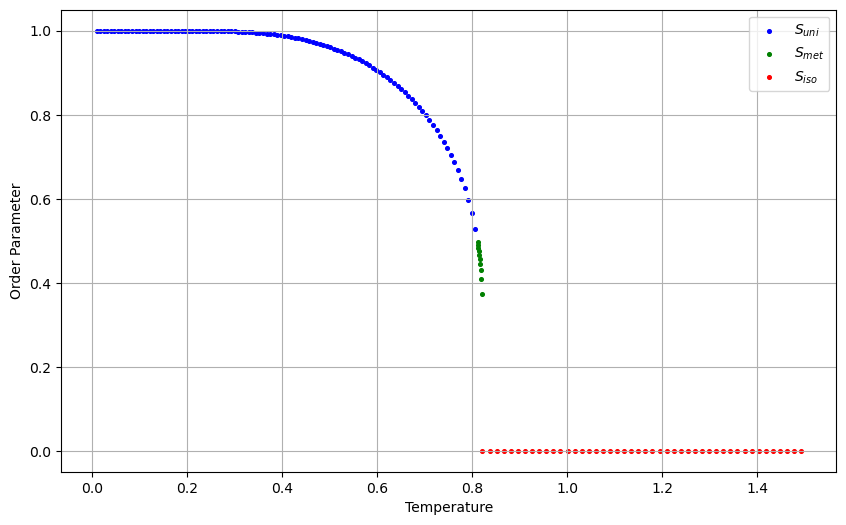

In [251]:
S_uni=[] 
t_uni=[]
S_met=[]
t_met=[]
S_iso=[]
t_iso=[]

for i in range(len(T_stable)): 
    s= S_stable[i]
    t= T_stable[i]
    delta= delta_e[i]
    
    if s> 1e-6 and delta<0: 
        S_uni.append(s)
        t_uni.append(t)

    elif s>1e-6 and delta>0: 
        S_met.append(s)
        t_met.append(t)

    elif abs(s) < 1e-6 and delta>=0: 
        S_iso.append(s)
        t_iso.append(t) 

t_uni= t_uni[::25]
S_uni= S_uni[::25]

t_iso= t_iso[::50]
S_iso=S_iso[::50]

t_met= t_met[::3]
S_met= S_met[::3]

data1 = np.column_stack((t_uni, S_uni))
np.savetxt('Uniaxial_data', data1 , delimiter=' ', fmt='%f') 

data2 = np.column_stack((t_met, S_met))
np.savetxt('Metastable_data', data2 , delimiter=' ', fmt='%f')

data3 = np.column_stack((t_iso, S_iso))
np.savetxt('Isotropic_data', data3 , delimiter=' ', fmt='%f')

# Plot
fig3=plt.figure(figsize=(10, 6))

plt.scatter(t_uni, S_uni, label=r'$S_{uni}$', color='blue',s=7)
plt.scatter(t_met, S_met, label=r'$S_{met}$', color='green',s=7)
plt.scatter(t_iso, S_iso, label=r'$S_{iso}$', color='red',s=7)


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig3.savefig(fname='Uni_Met_Iso')

#### If $S\neq 0$ and $\eta \neq 0$

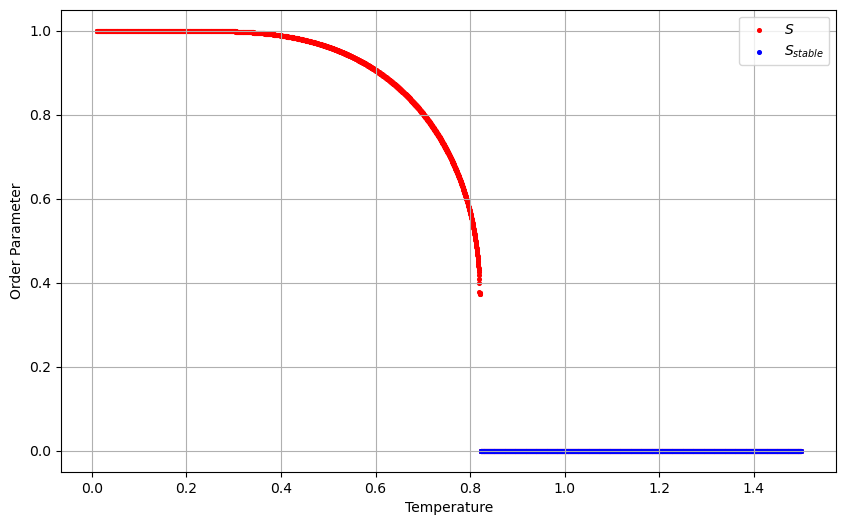

In [174]:
def free_energy(t,S,n): 
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp(-(3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t)

    return 3*(S**2)/4 + (n**2)/4 - t*np.log(exp_1+exp_2+exp_3)

def first_eqs(t,S,n): 
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp(3*(3*S+n)/(4*t))
    
    num= exp_2
    denom= 1+exp_1+exp_2 
    
    return S+(1/2)-(3/2)*num/denom

def seccond_eqs(t,S,n):
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp(3*(3*S+n)/(4*t))
    
    num= 1 - exp_1 
    denom= 1+exp_1+exp_2 

    return n + (3/2)*num/denom

def hessian(t,S,n): 
    exp_1= np.exp((3/4)*n/t)
    exp_2= np.exp((9/4)*S/t)
    exp_3= np.exp((3/2)*n/t)
    exp_4= np.exp((3/4)*(3*S+n)/t)
    exp_5= np.exp((9/4)*(S+n)/t)

    # Define the denominator
    denominator = t * (1 + exp_3 + exp_4)**2 

    # Define the elements of the Hessian matrix 
    H11 = 1 - (9/4)*(exp_1 * (exp_2 + exp_1))/denominator
    H12 = (9/4) * exp_3/ denominator
    H13 = (9/4) * exp_4 / denominator
    H22 = 1 -  (9/4)*(exp_3 * (1 + exp_4) )/ denominator
    H23 = (9/4) * exp_5  / denominator
    H33 = (4*t*exp_4 + 4*t*(1+exp_3)**2 + exp_4*(1+exp_3)*(-9+8*t)) / (4*denominator)

    # Construct the Hessian matrix using numpy
    hessian_matrix = np.array([[H11, H12, H13],
                                [H12, H22, H23],
                                [H13, H23, H33]])
    
    return hessian_matrix

eigenvalues=[]

def stability_check(t,S,n): 
    eigen_values = eigvals(hessian(t,S,n))
    eigenvalues.append(eigen_values)

    return False if any(i < 0 for i in eigen_values) else True

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5000)
S_vals = []
n_vals = []

for t in T_vals:
    sol = root(lambda x : [first_eqs(t,x[0],n=0), seccond_eqs(t,x[0],n=0)], [S_vals[-1], n_vals[-1]] if S_vals else [1.0, 0.0],  method='lm')
    S_vals.append(sol.x[0])
    n_vals.append(sol.x[1])

S_stable=[]
T_stable=[]


for i in range(len(T_vals)): 
    if stability_check(T_vals[i],S_vals[i],n=0):
        S_stable.append(S_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig4=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S_{stable}$', color='blue',s=7)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig4.savefig(fname='Stable_Result')


## Stability 

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_96043/548815303.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  denom = 4*np.log((-1-2*S)/(-1+S))
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_96043/548815303.py:3: RuntimeWarning: invalid value encountered in log
  denom = 4*np.log((-1-2*S)/(-1+S))


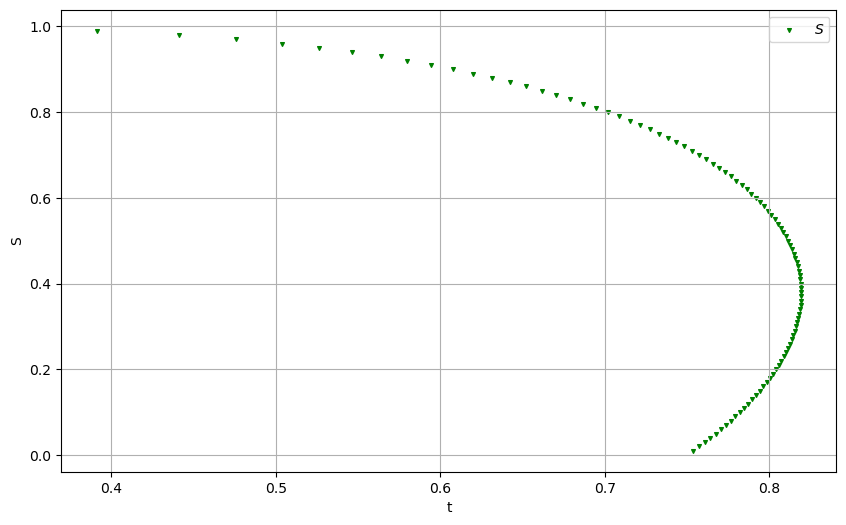

In [146]:
def test(S): 
    num = 9*S 
    denom = 4*np.log((-1-2*S)/(-1+S)) 

    return num/denom 

S_test_vals = np.linspace(0.01, 1.0, 100) 

test_vals=[]

for s in S_test_vals: 
    test_vals.append(test(s))

# Plot
fig5=plt.figure(figsize=(10, 6))

plt.scatter(test_vals,S_test_vals, label=r'$S$', color='green',s=7, marker="v")

plt.xlabel('t')
plt.ylabel('S')
plt.legend()
plt.grid(True) 
plt.show()

### Trying out new methods 

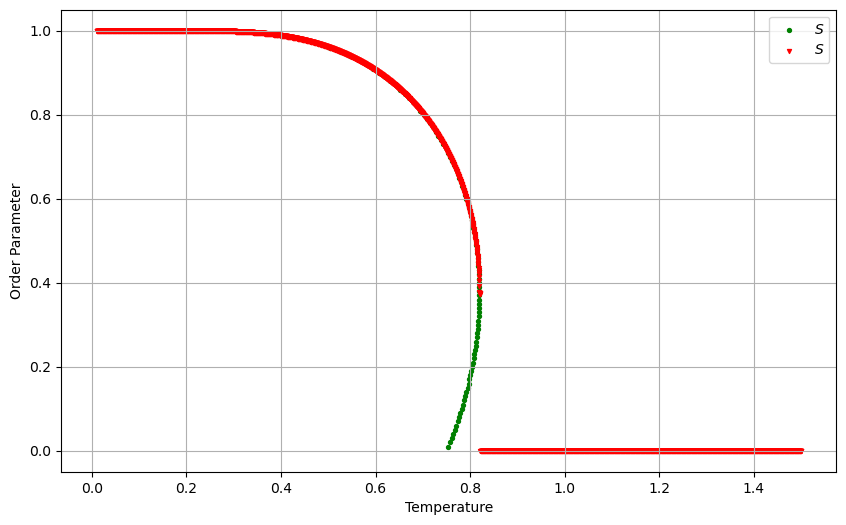

In [147]:
from scipy.optimize import root
import numpy as np

def first_eqs(t,S,n): 
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp(3*(3*S+n)/(4*t))
    num = exp_2
    denom = 1 + exp_1 + exp_2
    return S + (1/2) - (3/2) * num / denom

def seccond_eqs(t,S,n):
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp(3*(3*S+n)/(4*t))
    num = 1 - exp_1
    denom = 1 + exp_1 + exp_2
    return n + (3/2) * num / denom

def system(x, t):
    S, n = x
    return [first_eqs(t, S, n), seccond_eqs(t, S, n)]

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5500)
S_vals = []
n_vals = []

for t in T_vals:
    
    #sol = root(system, [S_vals[-1], 0] if S_vals else [1.0, 0.0], args=(t,), method='lm')
    sol = root(lambda x : [first_eqs(t,x[0],x[1]), seccond_eqs(t,x[0],x[1])], [S_vals[-1], n_vals[-1]] if S_vals else [0.6, 0.6],  method='lm')
    S_vals.append(sol.x[0])
    n_vals.append(sol.x[1])

S_stable=[]
n_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_check(T_vals[i], S_vals[i], n_vals[i]):
        S_stable.append(S_vals[i]) 
        n_stable.append(n_vals[i]) 
        T_stable.append(T_vals[i]) 
        
# Plot
fig4=plt.figure(figsize=(10, 6))

plt.scatter(test_vals,S_test_vals, label=r'$S$', color='green',s=8)
plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=8,marker="v")



plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig4.savefig(fname='Stable_Result_2')
